<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#вывод" data-toc-modified-id="вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

In [107]:
#%pip install --upgrade pip

In [108]:
#%pip install -q -r requirements-ml.txt

In [109]:
#%pip install scikit-learn==0.22.1

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [2]:
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [4]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [5]:
def replace_nan(data):
    for col in data.columns:
        data[col] = data[col].fillna(method='ffill')
    return data

df = replace_nan(df)
train = replace_nan(train)
test = replace_nan(test)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant             

In [6]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']
train['recovery'] = c *(f-t) / (f*(c-t)) * 100

In [8]:
mean_absolute_error(train['rougher.output.recovery'],train['recovery'] )

9.682896147825551e-15

Погрешность между расчитанным и имеющимся значениями, мала, примем её за 0.

## Анализ данных

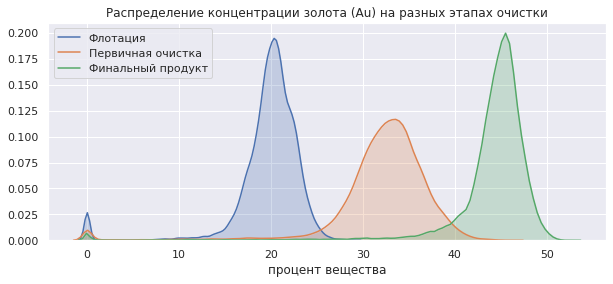

In [14]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.kdeplot(df['rougher.output.concentrate_au'], shade=True, label='Флотация' )
ax = sns.kdeplot(df['primary_cleaner.output.concentrate_au'], shade=True, label='Первичная очистка' )
ax = sns.kdeplot(df['final.output.concentrate_au'], shade=True, label='Финальный продукт' )
plt.title('Распределение концентрации золота (Au) на разных этапах очистки')
plt.xlabel('процент вещества');

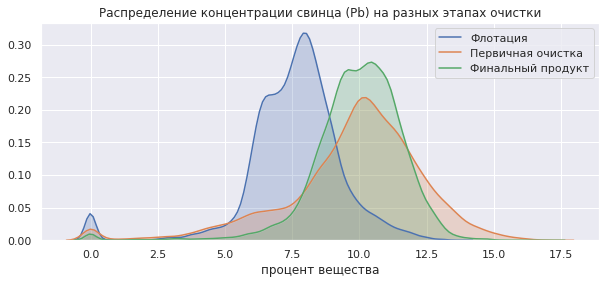

In [15]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.kdeplot(df['rougher.output.concentrate_pb'], shade=True, label='Флотация' )
ax = sns.kdeplot(df['primary_cleaner.output.concentrate_pb'], shade=True, label='Первичная очистка' )
ax = sns.kdeplot(df['final.output.concentrate_pb'], shade=True, label='Финальный продукт' )
plt.title('Распределение концентрации свинца (Pb) на разных этапах очистки')
plt.xlabel('процент вещества');

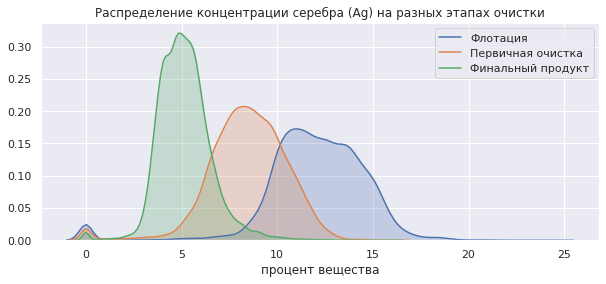

In [16]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.kdeplot(df['rougher.output.concentrate_ag'], shade=True, label='Флотация' )
ax = sns.kdeplot(df['primary_cleaner.output.concentrate_ag'], shade=True, label='Первичная очистка' )
ax = sns.kdeplot(df['final.output.concentrate_ag'], shade=True, label='Финальный продукт' )
plt.title('Распределение концентрации серебра (Ag) на разных этапах очистки')
plt.xlabel('процент вещества');

С каждым этапом очистки концентрация золота растет, а примисей падает(от первого к финальному).

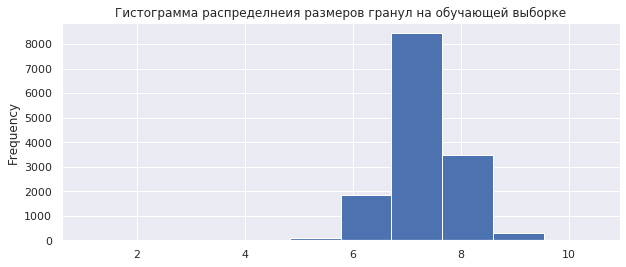

In [17]:
train['primary_cleaner.input.feed_size'].plot(kind='hist',grid=True,title = 'Гистограмма распределнеия размеров гранул на обучающей выборке')

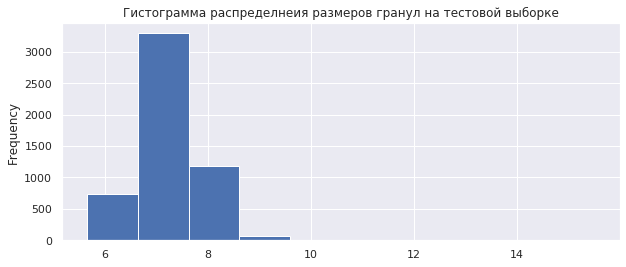

In [18]:
test['primary_cleaner.input.feed_size'].plot(kind='hist',grid=True,title = 'Гистограмма распределнеия размеров гранул на тестовой выборке')

Мы видим, что границы размеров гранул лежат в одних пределах и на обучающей и на тестовой выборке.А также формы распределения похожи

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f711f8ede10>,
      dtype=object)

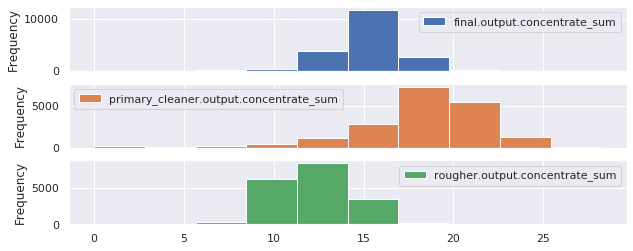

In [19]:
df['primary_cleaner.output.concentrate_sum'] = df['primary_cleaner.output.concentrate_ag']+df['primary_cleaner.output.concentrate_pb']
+df['primary_cleaner.output.concentrate_au']+df['primary_cleaner.output.concentrate_sol']
df['final.output.concentrate_sum'] = df['final.output.concentrate_ag'] + df['final.output.concentrate_pb']
+ df['final.output.concentrate_au'] + df['final.output.concentrate_sol']
df['rougher.output.concentrate_sum'] = df['rougher.output.concentrate_ag'] 
+ df['rougher.output.concentrate_pb']+ df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_sol']
for col in ['final.output.concentrate_sum','primary_cleaner.output.concentrate_sum','rougher.output.concentrate_sum']:
    df = df.drop(df[df[col]==0].index)
df.loc[:,['final.output.concentrate_sum','primary_cleaner.output.concentrate_sum','rougher.output.concentrate_sum']].plot(subplots = True,
                                                                                                                                 kind = 'hist')


Суммарная концентрация всех веществ смещается на разных этапах очистки.

## Модель

In [20]:
test = test.merge(df[['date','final.output.recovery','rougher.output.recovery']],how = 'inner')


In [21]:
test.shape

(5123, 55)

In [30]:
features_train = train.drop(['final.output.recovery','rougher.output.recovery','recovery','date'], axis=1)
features_test = test.drop(['final.output.recovery','rougher.output.recovery','date'], axis=1)
targets_train = train[['final.output.recovery','rougher.output.recovery']]
targets_test = test[['final.output.recovery','rougher.output.recovery']]


In [23]:
features_train.shape, features_test.shape

((14149, 84), (5123, 52))

In [31]:
features_1 = features_test.columns
features_train_1 = features_train[features_1].reset_index(drop=True)

In [25]:
targets_test 

,final.output.recovery,rougher.output.recovery
0,70.273583,89.993421
1,68.910432,88.089657
2,68.143213,88.412756
3,67.776393,87.360133
4,61.467078,83.236367
...,...,...
5118,68.919891,95.172585
5119,68.440582,94.575036
5120,67.092759,93.018138
5121,68.061186,92.599042


In [26]:
features_train_1.shape, features_test.shape

((14149, 52), (5123, 52))

In [27]:
targets_train.shape, targets_test.shape

((14149, 2), (5123, 2))

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
def smape(y_true, y_pred):
    y_pred = pd.DataFrame(data=y_pred)
    error = abs(y_true.values - y_pred.values)
        
    scale = (abs(y_true.values) + abs(y_pred.values)) / 2
    result = (error / scale).mean()
    return result

random_state = 123
cv = 5
models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state=random_state), 
          LinearRegression()]

target_rougher_train = targets_train[['rougher.output.recovery']]
target_final_train = targets_train[['final.output.recovery']]

target_rougher_test = targets_test.drop('final.output.recovery',axis = 1)
target_final_test = targets_test.drop('rougher.output.recovery',axis = 1)
results_cross_val = []

for model in models: 
    
    scorer = make_scorer(smape, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train_1, 
                                              target_rougher_train, 
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train_1, 
                                            target_final_train, 
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
result_cross_val = pd.DataFrame(results_cross_val)
result_cross_val['smaep'] = 0.25 *result_cross_val['cross_val_score_rougher'] + 0.75 *result_cross_val['cross_val_score_final'] 
result_cross_val

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array wa

,model name,cross_val_score_rougher,cross_val_score_final,smaep
0,DecisionTreeRegressor,NaN,NaN,NaN
1,RandomForestRegressor,-0.158482,-0.136110,-0.141703
2,LinearRegression,-0.128025,-0.122453,-0.123846


******************

In [47]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train_1, target_rougher_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = smape(target_rougher_test, dummy_rougher_pred)
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features_train_1, target_final_train)
dummy_final_pred = dummy_regressor_final.predict(features_test)
smape_dummy_final = smape(target_final_test, dummy_final_pred)
print('Метрика для DummyRegressor : ', 0.25 * smape_dummy_rougher + 0.75 * smape_dummy_final )


Метрика для DummyRegressor :  0.07409094662189526


Оценили полученную метрика на модели DummyRegressor, на построенных нами моделями значени метрики ниже, среди моделей метрика нижу у Линейной регрессии

## вывод

Для построения модели было необходимо :
- Познакомиться с данными;
- Провести исследовательский анализ, так мы обнаружили отличие между реальными и расчетными значениями эффективности;
- ЗАполнить пропуски в данных;
- Провести построение модели и рассчитать заданную метрику.
Метрика на построенной нами модели оказалась ниже, чем на модели с контсантой. Самое малое значени метрики получаем при построении модели Линейной регрессией.
